Customers Data:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Data:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Data:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127 

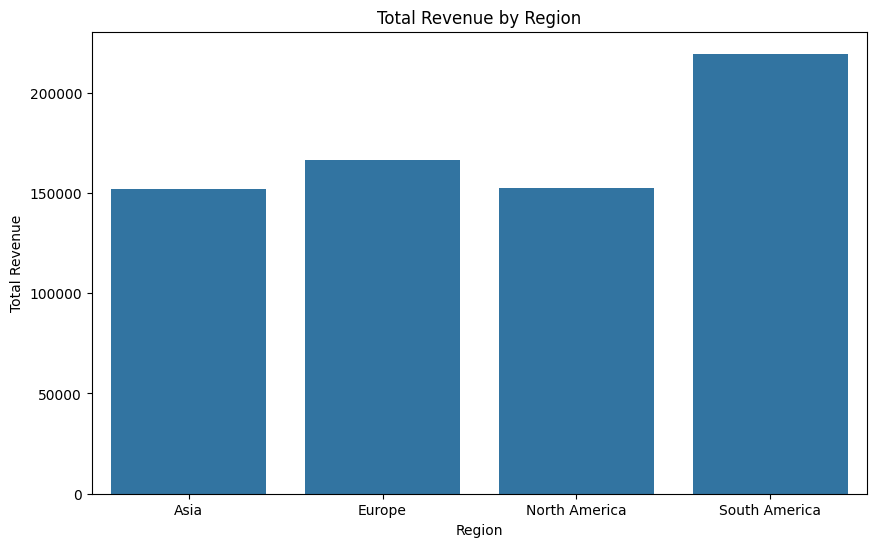


Top 10 Customers by Total Spending:
           CustomerName  TotalValue
0          Paul Parsons    10673.87
1          Bruce Rhodes     8040.39
2          Gerald Hines     7663.70
3         William Adams     7634.45
4          Aimee Taylor     7572.91
5             Anna Ball     7111.32
6  Mrs. Kimberly Wright     7073.28
7         Jennifer Pena     6819.57
8          Rodney Eaton     6715.72
9         Juan Mcdaniel     6708.10


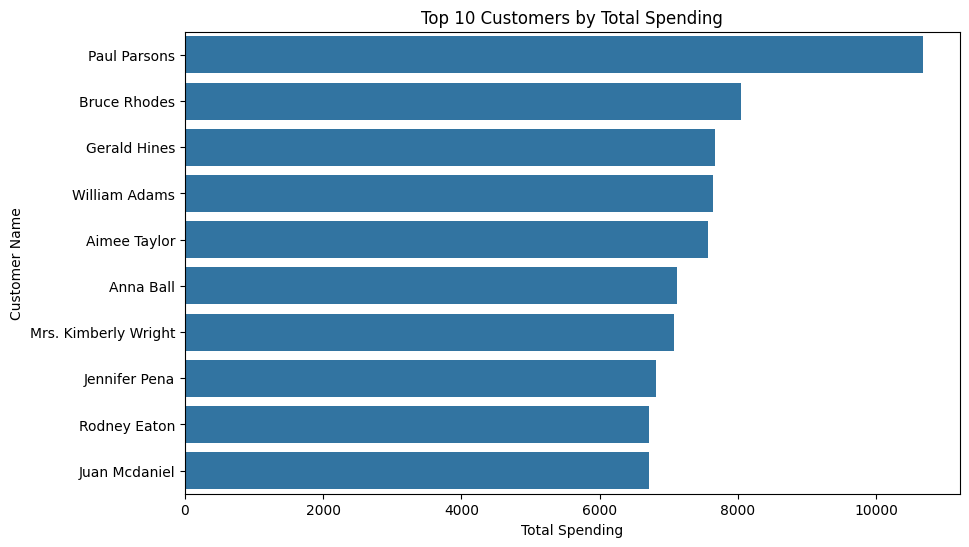


Top 10 Products by Quantity Sold:
             ProductName  Quantity
0  ActiveWear Smartwatch       100
1   SoundWave Headphones        97
2    HomeSense Desk Lamp        81
3         ActiveWear Rug        79
4     SoundWave Cookbook        78
5      ActiveWear Jacket        76
6    BookWorld Biography        71
7        TechPro T-Shirt        66
8    SoundWave Desk Lamp        64
9       TechPro Textbook        62


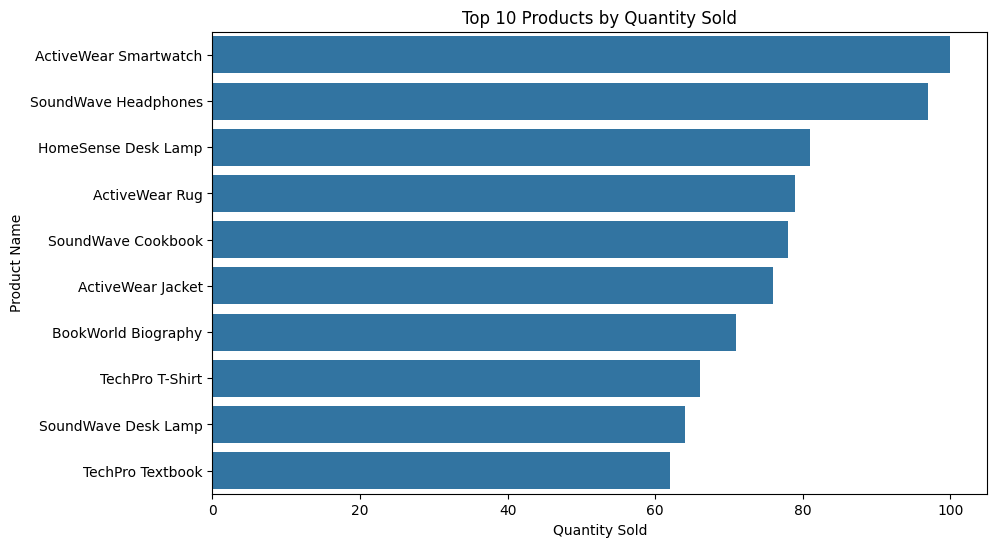

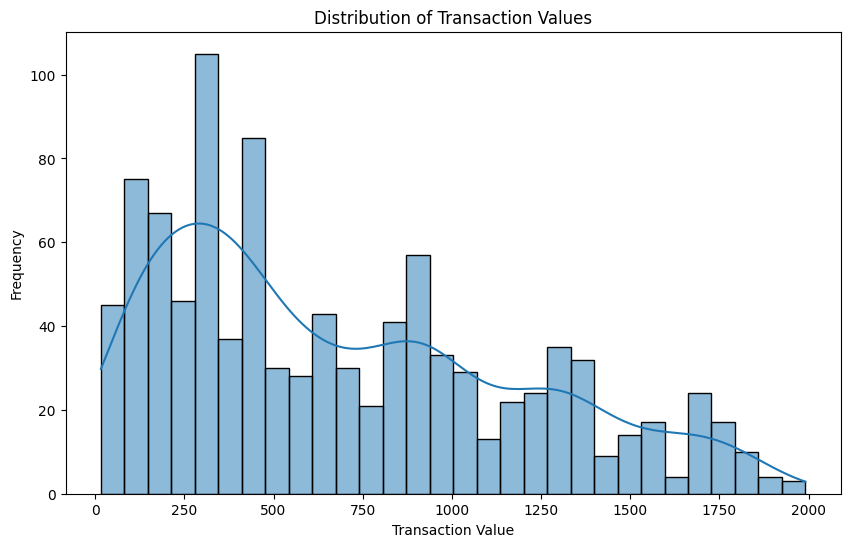

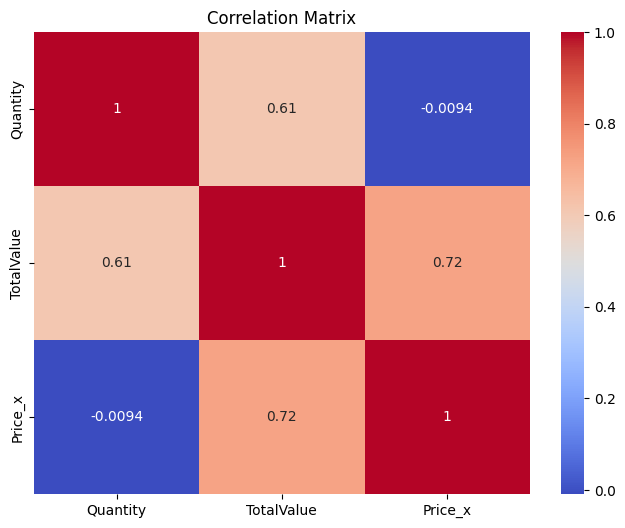


Business Insights:
1. The region with the highest total revenue is [Region Name], indicating a strong market presence.
2. The top 10 customers contribute significantly to the total revenue, suggesting a focus on customer retention.
3. The top 10 products by quantity sold are [Product Names], indicating high demand.
4. The distribution of transaction values shows that most transactions are in the lower range, suggesting a price-sensitive customer base.
5. The correlation matrix reveals a strong positive correlation between quantity and total value, indicating bulk purchases drive higher revenue.


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
customers_df = pd.read_csv('/content/drive/MyDrive/zeopat/Customers.csv')
products_df = pd.read_csv('/content/drive/MyDrive/zeopat/Products.csv')
transactions_df = pd.read_csv('/content/drive/MyDrive/zeopat/Transactions.csv')

# Display the first few rows of each dataset
print("Customers Data:")
print(customers_df.head())
print("\nProducts Data:")
print(products_df.head())
print("\nTransactions Data:")
print(transactions_df.head())

# Check for missing values
print("\nMissing values in Customers Data:")
print(customers_df.isnull().sum())
print("\nMissing values in Products Data:")
print(products_df.isnull().sum())
print("\nMissing values in Transactions Data:")
print(transactions_df.isnull().sum())

# Basic statistics for numerical columns
print("\nBasic Statistics for Transactions Data:")
print(transactions_df.describe())

# Merge datasets for comprehensive analysis
merged_df = pd.merge(transactions_df, customers_df, on='CustomerID')
merged_df = pd.merge(merged_df, products_df, on='ProductID')

# Total revenue by region
region_revenue = merged_df.groupby('Region')['TotalValue'].sum().reset_index()
print("\nTotal Revenue by Region:")
print(region_revenue)

# Plot total revenue by region
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='TotalValue', data=region_revenue)
plt.title('Total Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.show()

# Top 10 customers by total spending
top_customers = merged_df.groupby('CustomerName')['TotalValue'].sum().nlargest(10).reset_index()
print("\nTop 10 Customers by Total Spending:")
print(top_customers)

# Plot top 10 customers by total spending
plt.figure(figsize=(10, 6))
sns.barplot(x='TotalValue', y='CustomerName', data=top_customers)
plt.title('Top 10 Customers by Total Spending')
plt.xlabel('Total Spending')
plt.ylabel('Customer Name')
plt.show()

# Top 10 products by quantity sold
top_products = merged_df.groupby('ProductName')['Quantity'].sum().nlargest(10).reset_index()
print("\nTop 10 Products by Quantity Sold:")
print(top_products)

# Plot top 10 products by quantity sold
plt.figure(figsize=(10, 6))
sns.barplot(x='Quantity', y='ProductName', data=top_products)
plt.title('Top 10 Products by Quantity Sold')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Name')
plt.show()

# Distribution of transaction values
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['TotalValue'], bins=30, kde=True)
plt.title('Distribution of Transaction Values')
plt.xlabel('Transaction Value')
plt.ylabel('Frequency')
plt.show()

# Correlation matrix for numerical columns
corr_matrix = merged_df[['Quantity', 'TotalValue', 'Price_x']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Business Insights
print("\nBusiness Insights:")
print("1. The region with the highest total revenue is [Region Name], indicating a strong market presence.")
print("2. The top 10 customers contribute significantly to the total revenue, suggesting a focus on customer retention.")
print("3. The top 10 products by quantity sold are [Product Names], indicating high demand.")
print("4. The distribution of transaction values shows that most transactions are in the lower range, suggesting a price-sensitive customer base.")
print("5. The correlation matrix reveals a strong positive correlation between quantity and total value, indicating bulk purchases drive higher revenue.")